Next Steps:

1.) Run Light Python EDA

     Descrptive Stats

     Fraud vs non-fraud frequency

     Distributions of key variables (think premium, deductible, capital gains/loss)

     Correlation heatmap
    
     Outlier detection

2.) Move to Tableau Public 

     Visualize 4-5 of my most interesting relationships

     Build Dashboards to explain risk factors
    


In [37]:
#Lets first load the data csv file into a pandas dataframe
import pandas as pd

df = pd.read_csv('insurance_claims_cleaned.csv')

In [38]:
df.columns


Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [39]:
#Now lets do some initial descriptive statistics and visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#Lets do some initial descriptive statistics and visualizations
#pd.set_option('display.max_columns', None)   # show all columns
#pd.set_option('display.width', None)         # let pandas decide width
#print(df.describe(include='all').to_string())
print(df.describe())  # default view, more concise, has numeric columns only

       months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    9.990000e+02    1000.000000    1000.000000   
mean             1256.406150    1.103103e+06  501214.488000   25126.100000   
std               244.167395    2.297594e+06   71701.610941   27872.187708   
min

Some Initial Ideas For EDA based off the above information.

fraud target (e.g., fraud_reported / fraud) — required for all comparisons (fraud vs non‑fraud frequency, rates).


total_claim_amount / claim_amount — numeric, likely skewed and directly related to fraud/impact.


policy_annual_premium, policy_deductible — numeric financial features, check distributions and outliers.


age — demographic; distribution and relation to claim/fraud.


capital_gains, capital_loss (or similar) — numeric, often sparse/skewed; check for zeros/outliers.


incident_type, incident_severity, collision_type — low-cardinality categorical; good for grouping by fraud rate.


insured_sex, insured_education_level, policy_state — categorical demographics/location to test risk differences.


vehicle_make/model or vehicle_age — if present, useful for risk segmentation.
any date fields (incident_date, policy_bind_date) — convert to datetime and inspect recency/seasonality.

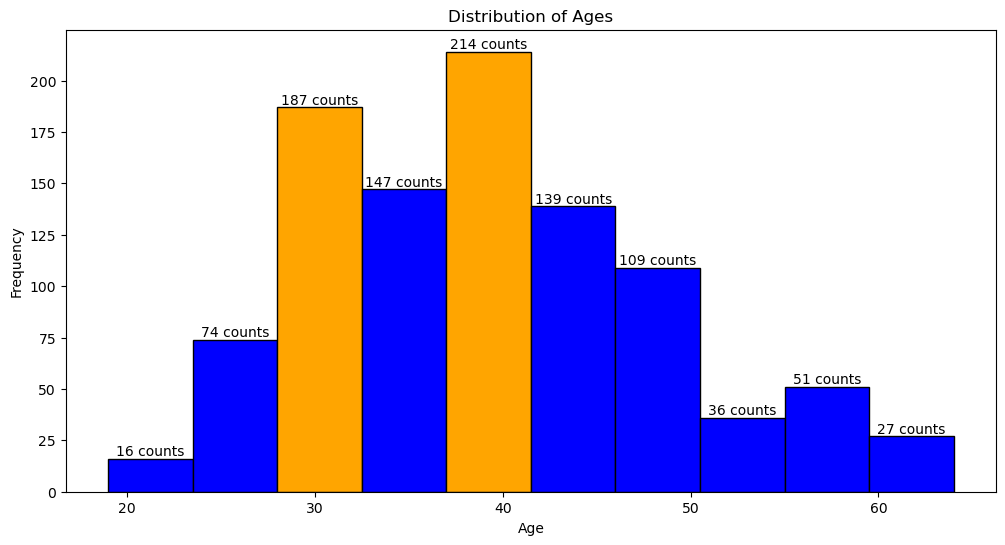

In [40]:
#Some of the most important columns to look at are:
#1. age, premium, deductible, capital gains/losses, and claim amount

#Lets look at the distribution of ages

# Plot histogram
bins = 10
plt.figure(figsize=(12,6))
counts, bins, patches = plt.hist(df['age'], bins=bins, edgecolor='black') 

# Find indices of top 2 bins by count
top_bins_idx = np.argsort(counts)[-2:]

# Color the top 2 bins differently
for i, patch in enumerate(patches):
    if i in top_bins_idx:
        patch.set_facecolor('orange')  # highlight color
    else:
        patch.set_facecolor('blue')    # default color

# Add count labels on top of each bar
for count, bin_edge in zip(counts, bins):
    if count > 0:  # only annotate if bin has data
        plt.text(bin_edge + (bins[1]-bins[0])/2, count,
                 f"{int(count)} counts", ha='center', va='bottom')

plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

age_group
<20      1.000000
20-29    0.253247
30-39    0.240000
40-49    0.229560
50-59    0.290000
60-69    0.333333
70+           NaN
Name: fraud_reported, dtype: float64


C:\Users\ollie\AppData\Local\Temp\ipykernel_7232\300361342.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_group = df.groupby('age_group')['fraud_reported'].apply(lambda x: (x=='Y').mean())


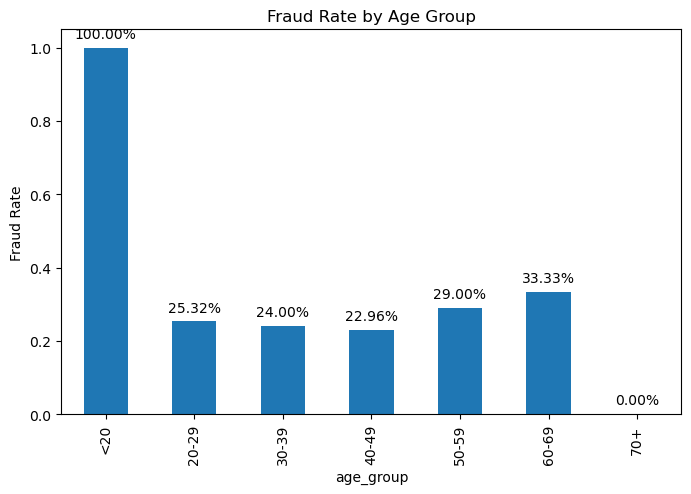

In [41]:
# Create age bins
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['<20','20-29','30-39','40-49','50-59','60-69','70+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Fraud rate per age group
fraud_by_group = df.groupby('age_group')['fraud_reported'].apply(lambda x: (x=='Y').mean())

print(fraud_by_group)

# Plot fraud rate by age group
ax = fraud_by_group.plot(kind='bar', figsize=(8,5), ylabel='Fraud Rate', title='Fraud Rate by Age Group')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

The Less than 20 age bracket has 100 fraud rate, this is likely an outlier and may be something to be dropped, same with 70+

Empty DataFrame
Columns: [months_as_customer, age, policy_number, policy_bind_date, policy_state, policy_csl, policy_deductable, policy_annual_premium, umbrella_limit, insured_zip, insured_sex, insured_education_level, insured_occupation, insured_hobbies, insured_relationship, capital-gains, capital-loss, incident_date, incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_location, incident_hour_of_the_day, number_of_vehicles_involved, property_damage, bodily_injuries, witnesses, police_report_available, total_claim_amount, injury_claim, property_claim, vehicle_claim, auto_make, auto_model, auto_year, fraud_reported, age_group]
Index: []

[0 rows x 40 columns]
age_group
<20           NaN
20-29    0.253247
30-39    0.240000
40-49    0.229560
50-59    0.290000
60-69    0.333333
70+           NaN
Name: fraud_reported, dtype: float64


C:\Users\ollie\AppData\Local\Temp\ipykernel_7232\2380736429.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_group = df.groupby('age_group')['fraud_reported'].apply(lambda x: (x=='Y').mean())


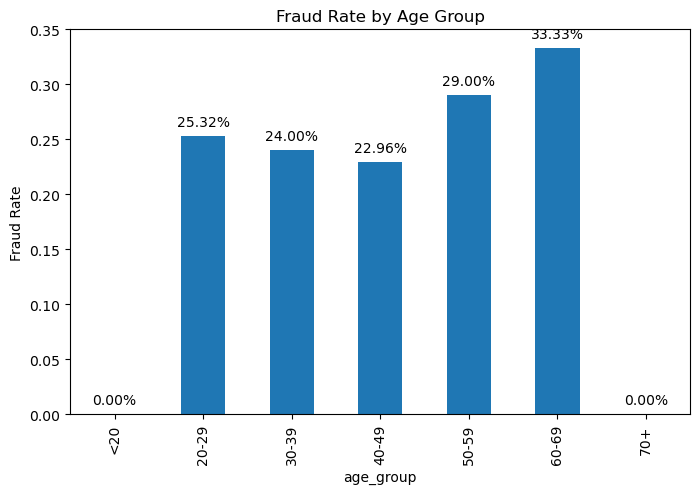

In [46]:
#lets investigate the fraud rate for < 20
young = df[df['age_group'] == '<20']
print(young)

#It is a real finding that the fraud rate is so high in the younger age group, but it is based on only 1 claim
#This is likely an outlier and may be something to be dropped, same with 70

#I'll drop these age groups for now
df = df.drop(df[df['age_group'] == '<20'].index)
df = df.drop(df[df['age_group'] == '70+'].index)

#Lets take a look at the fraud rate by age group again
# Fraud rate per age group
fraud_by_group = df.groupby('age_group')['fraud_reported'].apply(lambda x: (x=='Y').mean())

print(fraud_by_group)

# Plot fraud rate by age group
ax = fraud_by_group.plot(kind='bar', figsize=(8,5), ylabel='Fraud Rate', title='Fraud Rate by Age Group')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
